In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # To save the filtered audio
import scipy.signal as signal

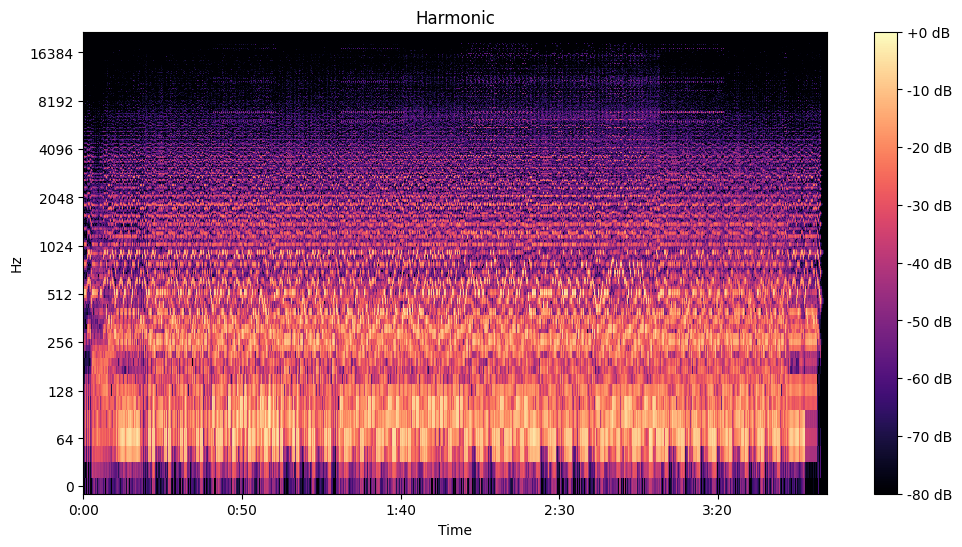

In [ ]:
# Load the audio
audio_path = "./sample_data/test.wav"  # Your file path
y, sr = librosa.load(audio_path, sr=None)

# Perform Harmonic-Percussive Separation
harmonic, percussive = librosa.effects.hpss(y)

# Save only the harmonic part (which contains guitar)
sf.write("harmonic.wav", harmonic, sr)
sf.write("percussive.wav", percussive, sr)

# Compute STFT of harmonic part
stft_harmonic = librosa.stft(harmonic)
stft_db = librosa.amplitude_to_db(np.abs(stft_harmonic), ref=np.max)

# Plot spectrogram of extracted guitar part
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Harmonic")
plt.show()


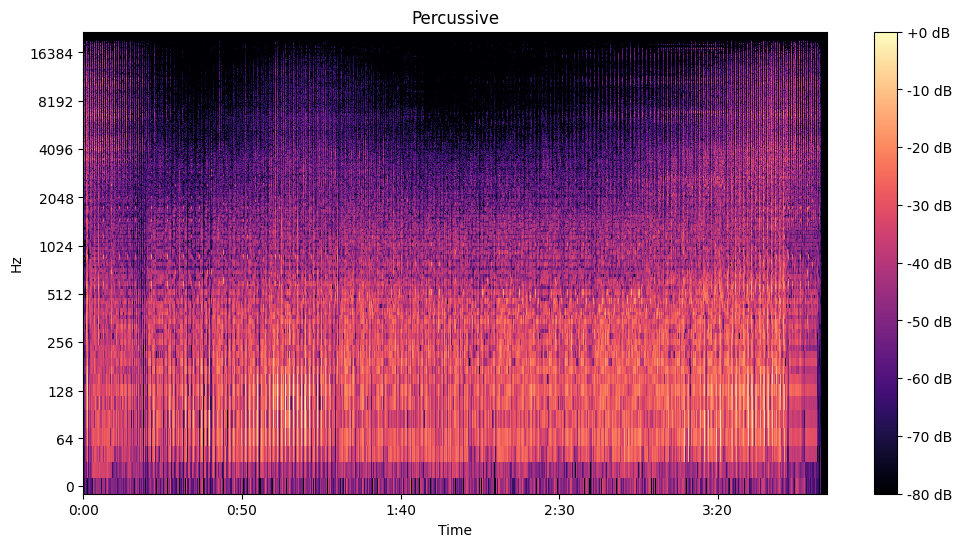

In [ ]:
stft_percussive = librosa.stft(percussive)
stft_db_percussive = librosa.amplitude_to_db(np.abs(stft_percussive), ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db_percussive, sr=sr, hop_length=512, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Percussive")
plt.show()

In [ ]:
print(sr)

44100


In [51]:
def butter_bandpass(low_freq, high_freq, sr, order=5):
    nyq = 0.5 * sr
    low = low_freq / nyq
    high = high_freq / nyq
    sos = signal.butter(order, [low, high], btype='band', output='sos')
    return sos

def apply_bandpass(audio, low_freq, high_freq, sr, order=5):
    sos = butter_bandpass(low_freq, high_freq, sr, order=order)
    y_filtered = signal.sosfiltfilt(sos, audio)
    return y_filtered

low_bass = apply_bandpass(percussive, 20, 100, sr, 5)
low_var = variance(low_bass)
threshold = np.percentile(low_var, 90)
print(f"threshold: {threshold}")
kick_indices = [i for i, v in enumerate(low_var) if v > threshold]
print(f"kick_indices: {kick_indices}")

moderate_bass = apply_bandpass(percussive, 100, 500, sr, 5)
moderate_var = variance(moderate_bass)


high_bass = apply_bandpass(percussive, 500, 2000, sr, 5)
high_var = variance(high_bass)

print(f"No. of sample points: {len(low_bass)}")

kick_drums = low_bass + moderate_bass + high_bass

threshold: 3.996028876937736e-05
kick_indices: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 434, 435, 436, 437, 439, 440, 442, 566, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 799, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 819, 989, 991, 992, 993, 994, 996, 997, 999, 1123, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1143, 1354, 1357, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1376, 1377, 1409, 1411, 1412, 1547, 1548, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1560, 1683, 1685, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1695, 1696, 1698, 1699, 1700, 1701, 1704, 1918, 1920, 1921, 1923, 1924, 1925, 1926, 1928, 1929, 1931, 1932, 1934, 2113, 2242, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2252, 2253, 2255,

In [ ]:
sf.write('kick_drums.wav', kick_drums, sr)

In [46]:
def variance(data):
  window_size = 100
  variance = []
  for i in range(0, len(data) - window_size, 100):
    window = data[i:i+window_size]
    var = np.var(window)
    variance.append(var)
  return variance

In [ ]:
def var_to_sample_points(low_bass, selected_points):


In [49]:
def plot_variance(variance):
  plt.figure(figsize=(12, 6))
  plt.plot(variance)
  plt.show()